In [1]:
import numpy as np
import pandas as pd
import queue
import matplotlib.pyplot as plt

from BayesianOptimization.bayesian_optimization import BayesianOptimization

from Backtest.backtest import Backtest
from Backtest.data import OHLCDataHandler
from ADXStrategy import ADXStrategy
from Backtest.open_json_gz_files import open_json_gz_files
from Backtest.generate_bars import generate_bars

In [2]:
def run_backtest(config, trading_data, ohlc_data, window):
    window = int(window)
    config['title'] = "ADXStrategy" + "_" + str(window)
    print("---------------------------------")
    print(config['title'])
    print("---------------------------------")
    
    events_queue = queue.Queue()

    data_handler = OHLCDataHandler(
        config, events_queue,
        trading_data = trading_data, ohlc_data = ohlc_data
    )
    strategy = ADXStrategy(config, events_queue, data_handler,
                           window = window)

    backtest = Backtest(config, events_queue, strategy,
                        data_handler= data_handler)

    results = backtest.start_trading()
    
    # dict_ans = {
    #     "window": window,
    #     "Sharpe Ratio": [results['sharpe']],
    #     "Total Returns": [(results['cum_returns'][-1] - 1)],
    #     "Max Drawdown": [(results["max_drawdown"] * 100.0)],
    #     "Max Drawdown Duration": [(results['max_drawdown_duration'])],
    #     "Trades": [results['trade_info']['trading_num']],
    #     "Trade Winning": [results['trade_info']['win_pct']],
    #     "Average Trade": [results['trade_info']['avg_trd_pct']],
    #     "Average Win": [results['trade_info']['avg_win_pct']],
    #     "Average Loss": [results['trade_info']['avg_loss_pct']],
    #     "Best Trade": [results['trade_info']['max_win_pct']],
    #     "Worst Trade": [results['trade_info']['max_loss_pct']],
    #     "Worst Trade Date": [results['trade_info']['max_loss_dt']],
    #     "Avg Days in Trade": [results['trade_info']['avg_dit']]
    # }
    # return pd.DataFrame(dict_ans)
    return (results['cum_returns'][-1] - 1)

## Setting

In [3]:
config = {
    "csv_dir": "C:/backtest/Binance",
    "out_dir": "C:/backtest/results/ADXStrategy",
    "title": "ADXStrategy",
    "is_plot": False,
    "save_plot": False,
    "save_tradelog": False,
    "start_date": pd.Timestamp("2017-07-01T00:0:00", freq = "60" + "T"),    # str(freq) + "T"
    "end_date": pd.Timestamp("2018-04-01T00:00:00", freq = "60" + "T"),
    "equity": 1.0,
    "freq": 60,      # min
    "commission_ratio": 0.001,
    "suggested_quantity": None,     # None or a value
    "max_quantity": None,           # None or a value, Maximum purchase quantity
    "min_quantity": None,           # None or a value, Minimum purchase quantity
    "min_handheld_cash": None,      # None or a value, Minimum handheld funds
    "exchange": "Binance",
    "tickers": ['BTCUSDT']
}

In [4]:
# trading_data = {}
# for ticker in config['tickers']:
#     # trading_data[ticker] = open_gz_files(config['csv_dir'], ticker)
#     trading_data[ticker] = pd.read_hdf(config['csv_dir'] + '\\' + ticker + '.h5', key=ticker)

ohlc_data = {}
for ticker in config['tickers']:
    # ohlc_data[ticker] = generate_bars(trading_data, ticker, config['freq'])
    ohlc_data[ticker] = pd.read_hdf(config['csv_dir'] + '\\' + ticker +'_OHLC_60min.h5', key=ticker)

trading_data = None

In [7]:
gp_params = {"alpha": 1e-5}


## Acquisition Function "Expected Improvement"


* Prefer exploitation (xi=1e-4)
* Prefer exploration (xi=0.1)

In [16]:
BO = BayesianOptimization(
    run_backtest,
    {'window': (1, 240)},
    is_int = [1], 
    invariant = {
        'config': config,
        'trading_data': trading_data,
        'ohlc_data': ohlc_data
    },
    random_state = 1
)
# BO.explore({
#     'window': np.arange(1, 240, 20)
#     },
#     eager=True)
BO.maximize(init_points=12, n_iter=20, acq="ei", xi=0.01, **gp_params)

Initialization
-----------------------------------------
 Step |   Time |      Value |    window | 
---------------------------------
ADXStrategy_38
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.8530093055
Max Drawdown: 40.8872998398
Max Drawdown Duration: 2510
Total Returns: 0.3037384426
---------------------------------
Trades: 87
Trade Winning: 39%
Average Trade: 0.67%
Average Win: 5.56%
Average Loss: -2.46%
Best Trade: 25.56%
Worst Trade: -10.16%
Worst Trade Date: 0 days 02:00:00
Avg Days in Trade: 0 days 19:12:25
---------------------------------
    1 | 00m04s |    0.30374 | 38.000000 | 
---------------------------------
ADXStrategy_236
---------------------------------
Data Time Interval for BTCUSDT:
	Start

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.6956434877
Max Drawdown: 54.0941213880
Max Drawdown Duration: 2736
Total Returns: 0.2069504236
---------------------------------
Trades: 48
Trade Winning: 44%
Average Trade: 0.79%
Average Win: 5.03%
Average Loss: -2.50%
Best Trade: 24.58%
Worst Trade: -12.17%
Worst Trade Date: 0 days 07:00:00
Avg Days in Trade: 1 days 07:52:30
---------------------------------
   11 | 00m04s |    0.20695 | 130.000000 | 
---------------------------------
ADXStrategy_205
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.0931882348
Max Drawdown: 60.1931783344
Max Drawdown Duration: 2736
Total Returns: -0.1511668326
--------------------

---------------------------------
ADXStrategy_56
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.7345581199
Max Drawdown: 39.6956209884
Max Drawdown Duration: 2736
Total Returns: 0.2272857979
---------------------------------
Trades: 78
Trade Winning: 32%
Average Trade: 0.62%
Average Win: 6.34%
Average Loss: -2.07%
Best Trade: 23.29%
Worst Trade: -8.76%
Worst Trade Date: 1 days 20:00:00
Avg Days in Trade: 0 days 21:17:42
---------------------------------
   22 | 00m07s |    0.22729 | 56.000000 | 
---------------------------------
ADXStrategy_178
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running

In [22]:
print(BO.res['max'])

{'max_val': 1.4193076529119715, 'max_params': {'window': 18.0}}


In [23]:
BO.maximize(init_points=0, n_iter=20, acq="ei", xi=0.0001, **gp_params)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |    window | 
---------------------------------
ADXStrategy_151
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.2845700786
Max Drawdown: 55.9999979665
Max Drawdown Duration: 2736
Total Returns: -0.0015552972
---------------------------------
Trades: 56
Trade Winning: 36%
Average Trade: 0.36%
Average Win: 5.35%
Average Loss: -2.41%
Best Trade: 23.59%
Worst Trade: -9.73%
Worst Trade Date: 0 days 09:00:00
Avg Days in Trade: 1 days 01:52:30
---------------------------------
   53 | 00m07s |   -0.00156 | 151.000000 | 
---------------------------------
ADXStrategy_110
---------------------------------
Data Time Interval for BTCUSD

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.0139590951
Max Drawdown: 60.1252627621
Max Drawdown Duration: 2736
Total Returns: -0.1285824892
---------------------------------
Trades: 49
Trade Winning: 31%
Average Trade: 0.24%
Average Win: 7.49%
Average Loss: -2.96%
Best Trade: 46.10%
Worst Trade: -14.91%
Worst Trade Date: 1 days 05:00:00
Avg Days in Trade: 1 days 03:39:11
---------------------------------
   63 | 00m06s |   -0.12858 | 223.000000 | 
---------------------------------
ADXStrategy_109
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.1145544785
Max Drawdown: 43.9522581050
Max Drawdown Duration: 2736
Total Returns: 0.4412888646
--------------------

In [24]:
print(BO.res['max'])

{'max_val': 1.4193076529119715, 'max_params': {'window': 18.0}}


In [27]:
Target = pd.DataFrame({'Parameters': BO.X.tolist(), 'Target': BO.Y})
# Target.to_csv(config['out_dir'] + "/target_ei.csv")
Target.sort_values(by = "Parameters")

,Parameters,Target
19,[1.0],-0.940757
43,[7.0],-0.623499
47,[10.0],0.190254
14,[13.0],-0.076718
41,[17.0],1.039698
33,[18.0],1.419308
40,[19.0],1.204051
13,[20.0],1.307517
56,[21.0],1.382690
27,[22.0],1.037714


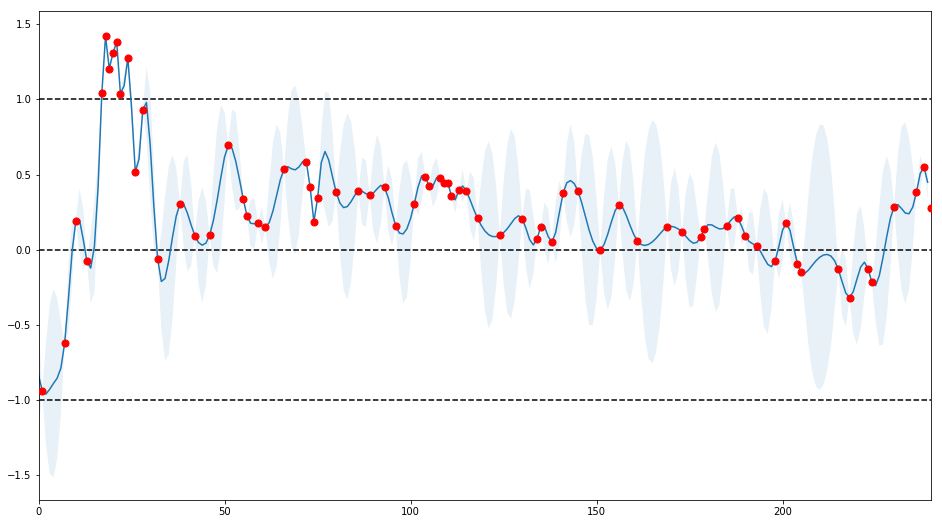

In [28]:
length = 240
mean, sigma = BO.gp.predict(np.arange(length).reshape(-1, 1), return_std=True)

fig = plt.figure(figsize=(16, 9))
plt.plot(np.arange(length), mean)
plt.fill_between(np.arange(length), mean + sigma, mean - sigma, alpha=0.1)
plt.scatter(BO.X.flatten(), BO.Y, c="red", s=50, zorder=10)
plt.xlim(0, length)
plt.hlines(0, 0, 240, hold=None,color='black',linestyle="--")
plt.hlines(-1, 0, 240, hold=None,color='black',linestyle="--")
plt.hlines(1, 0, 240, hold=None,color='black',linestyle="--")
plt.show()

## Acquisition Function "Upper Confidence Bound"




* Prefer exploitation (kappa=1.0)

* Prefer exploration (kappa=10)

## Acquisition Function "Probability of Improvement"

* Prefer exploitation (xi=1e-4)
* Prefer exploration (xi=0.1)